![NCIA](NCIA_Images\start.png)

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.11


## Statistical Data Visualization com Seaborn 

O Seaborn é uma biblioteca de visualização estatística baseada no Matplotlib. Ela oferece uma interface de alto nível para criar gráficos estatísticos informativos e atraentes.

https://seaborn.pydata.org/

In [2]:
!pip install -q seaborn

In [3]:
# Imports
import random
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
np.__version__

'2.2.6'

In [5]:
pd.__version__

'2.3.1'

In [6]:
mat.__version__

'3.10.5'

In [7]:
import seaborn as sea
sea.__version__

'0.13.2'

## Criando Gráficos com Seaborn

In [8]:
# Carregando um dos datasets que vem com o Seaborn
dados = sea.load_dataset("tips")

### Dataset de Gorjetas
O dataset "tips" contém informações sobre gorjetas em um restaurante, incluindo o valor total da conta, gorjeta, se o cliente é fumante, dia da semana, etc.


### Gráfico Jointplot
O jointplot combina três visualizações em uma:
1. Gráfico de dispersão central
2. Distribuição da variável x no topo
3. Distribuição da variável y na lateral
Aqui visualizamos a relação entre valor total da conta e gorjeta, com uma linha de regressão.


In [9]:
dados.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


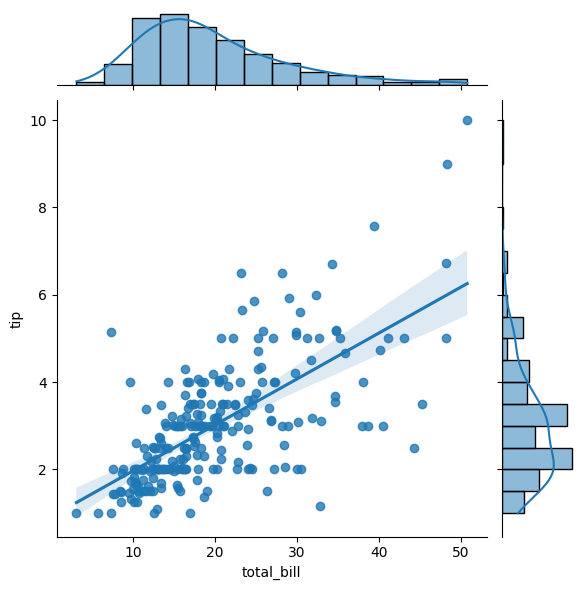

In [10]:
# O método joinplot cria plot de 2 variáveis com gráficos bivariados e univariados
sea.jointplot(data = dados, x = "total_bill", y = "tip", kind = 'reg')

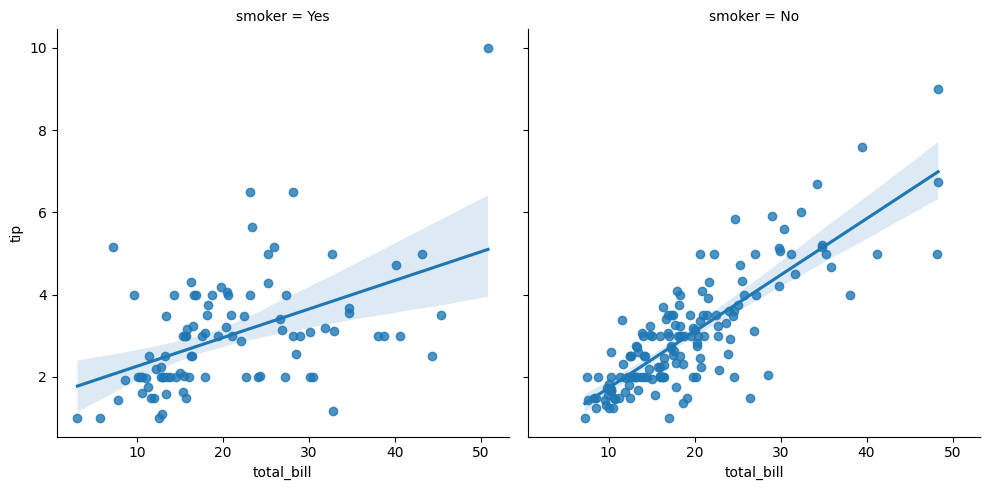

In [11]:
# O método lmplot() cria plot com dados e modelos de regressão
sea.lmplot(data = dados, x = "total_bill", y = "tip", col = "smoker")

In [12]:
# Construindo um dataframe com Pandas
df = pd.DataFrame()

In [13]:
# Alimentando o Dataframe com valores aleatórios
df['idade'] = random.sample(range(20, 100), 30)
df['peso'] = random.sample(range(55, 150), 30)

### Gráfico de Regressão (lmplot)
O lmplot mostra a relação entre duas variáveis e ajusta automaticamente uma linha de regressão linear. 
Neste caso, analisamos a relação entre idade e peso dos indivíduos.


In [14]:
df.shape

(30, 2)

### Gráfico de Densidade (KDE)
O KDE (Kernel Density Estimation) mostra a distribuição dos dados de forma suavizada.
É útil para visualizar a forma da distribuição e identificar onde os dados estão concentrados.


In [15]:
df.head()

,idade,peso
0,69,70
1,79,125
2,36,94
3,40,67
4,22,144


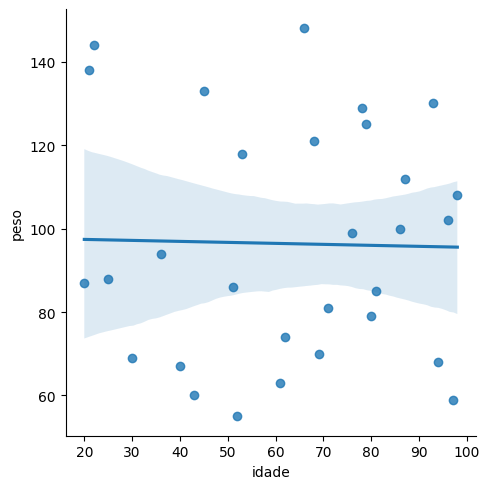

In [16]:
# lmplot
sea.lmplot(data = df, x = "idade", y = "peso", fit_reg = True)

### Box Plot
O Box Plot mostra:
- Mediana (linha central)
- Quartis (caixa)
- Valores extremos (whiskers)
- Outliers (pontos)
Excelente para visualizar a distribuição e identificar valores atípicos.


<Axes: xlabel='idade', ylabel='Density'>

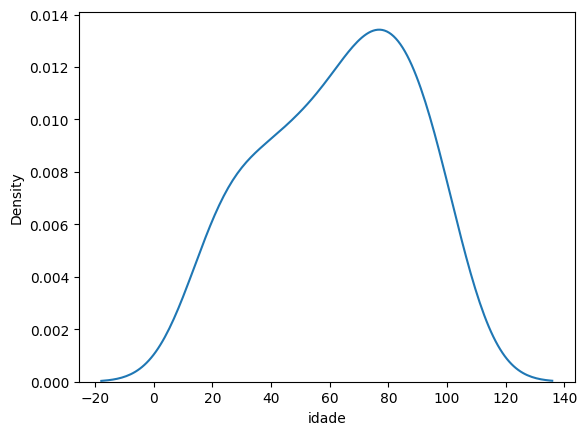

In [17]:
# kdeplot
sea.kdeplot(df.idade)

### Violin Plot
Combina um Box Plot com um KDE plot rotacionado.
Mostra a distribuição completa dos dados, sendo mais informativo que o Box Plot para visualizar a forma da distribuição.


<Axes: xlabel='peso', ylabel='Density'>

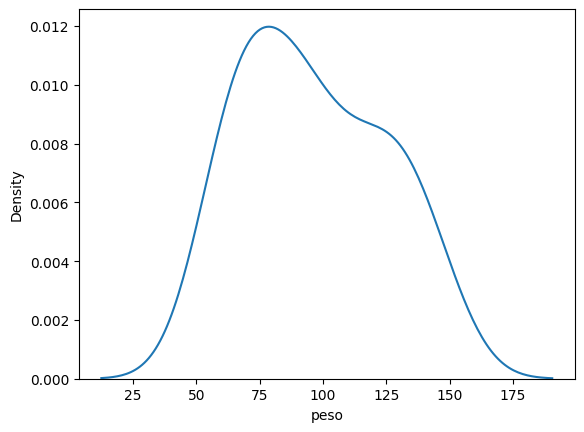

In [18]:
# kdeplot
sea.kdeplot(df.peso)

<Axes: xlabel='peso', ylabel='Density'>

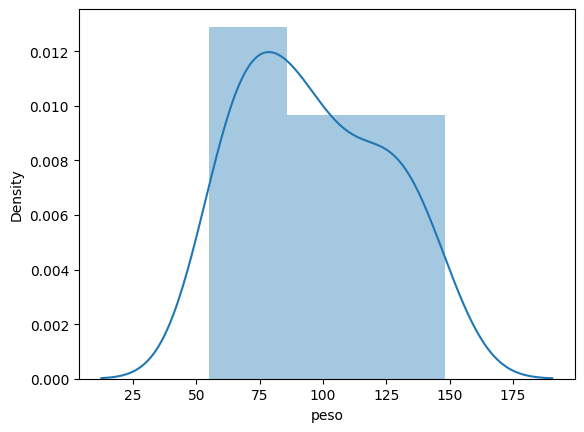

In [19]:
# distplot
sea.distplot(df.peso)

## Exemplo Prático: Análise de Dados de Saúde
Neste exemplo, criamos um dataset simulado para analisar a relação entre:
- Altura e peso de pessoas
- Diferenças entre fumantes e não fumantes
O gráfico final mostra como essas variáveis se relacionam, com linhas de regressão separadas para cada grupo.


<Axes: xlabel='idade'>

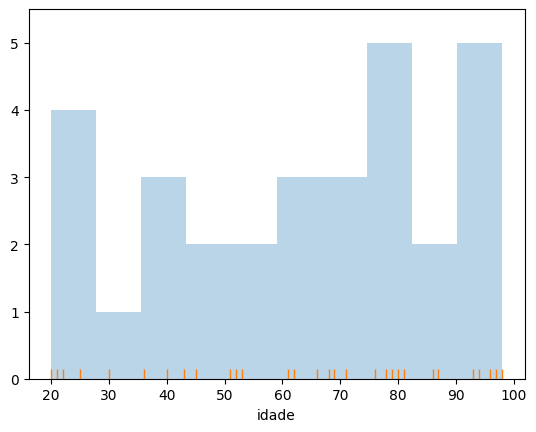

In [20]:
# Histograma
plt.hist(df.idade, alpha = .3)
sea.rugplot(df.idade)

<Axes: ylabel='idade'>

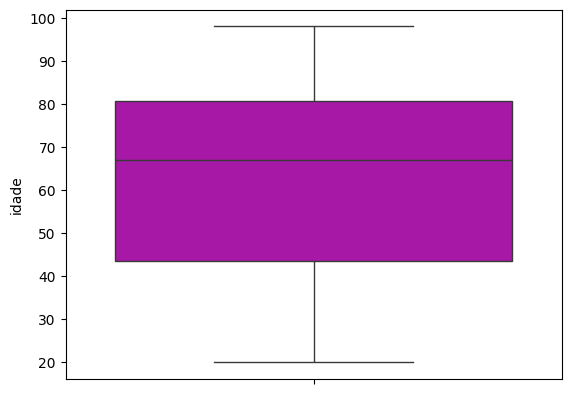

In [21]:
# Box Plot
sea.boxplot(df.idade, color = 'm')

<Axes: ylabel='peso'>

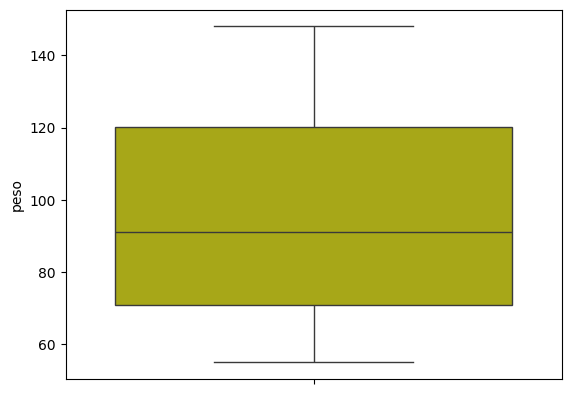

In [22]:
# Box Plot
sea.boxplot(df.peso, color = 'y')

<Axes: ylabel='idade'>

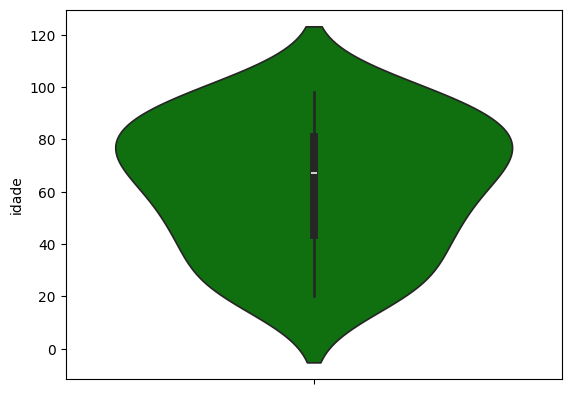

In [23]:
# Violin Plot
sea.violinplot(df.idade, color = 'g')

<Axes: ylabel='peso'>

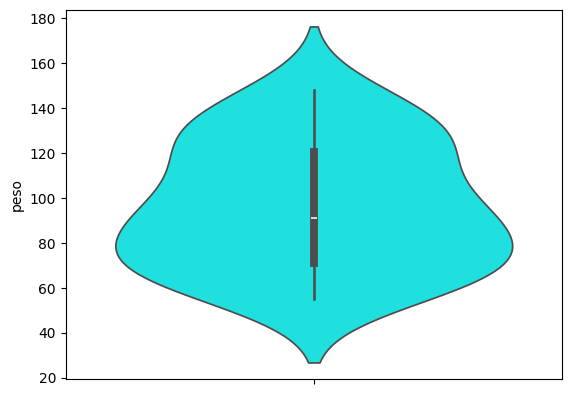

In [24]:
# Violin Plot
sea.violinplot(df.peso, color = 'cyan')

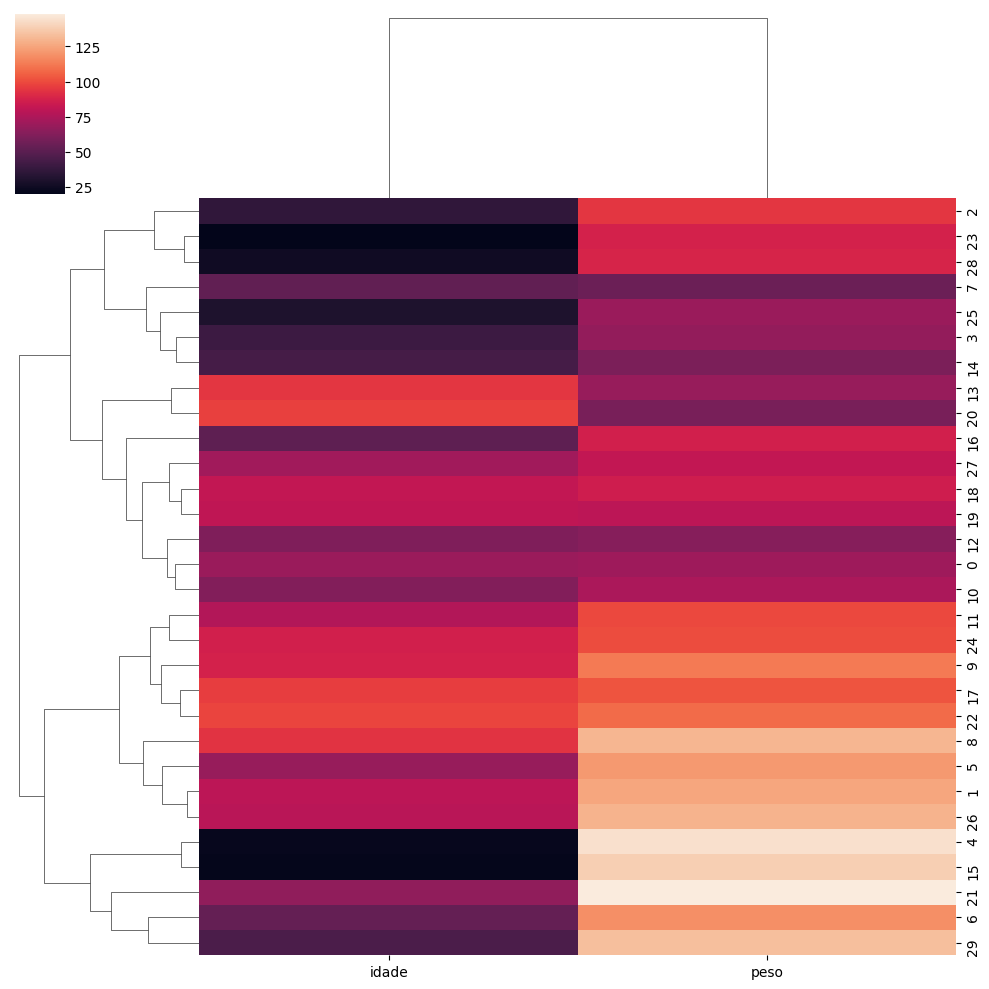

In [25]:
# Clustermap
sea.clustermap(df)

## Usando Matplotlib, Seaborn, NumPy e Pandas na Criação de Gráfico Estatístico

In [26]:
# Valores randômicos
np.random.seed(42)
n = 1000
pct_smokers = 0.2

# Variáveis
flag_fumante = np.random.rand(n) < pct_smokers
idade = np.random.normal(40, 10, n)
altura = np.random.normal(170, 10, n)
peso = np.random.normal(70, 10, n)

# Dataframe
dados = pd.DataFrame({'altura': altura, 'peso': peso, 'flag_fumante': flag_fumante})

# Cria os dados para a variável flag_fumante
dados['flag_fumante'] = dados['flag_fumante'].map({True: 'Fumante', False: 'Não Fumante'})

In [27]:
dados.shape

(1000, 3)

In [28]:
dados.head()

,altura,peso,flag_fumante
0,155.936825,78.745171,Não Fumante
1,169.168944,63.502348,Não Fumante
2,154.952796,57.967991,Não Fumante
3,177.600560,59.579556,Não Fumante
4,170.824398,65.127971,Fumante


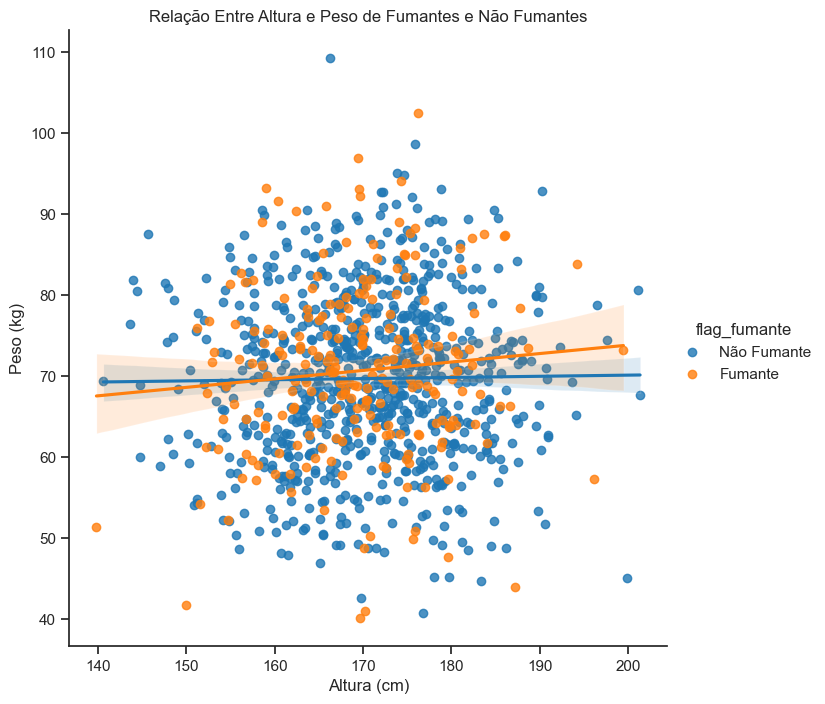

In [29]:
# Style
sea.set(style = "ticks")

# lmplot
sea.lmplot(x = 'altura', 
           y = 'peso', 
           data = dados, 
           hue = 'flag_fumante', 
           palette = ['tab:blue', 'tab:orange'], 
           height = 7)

# Labels e título
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.title('Relação Entre Altura e Peso de Fumantes e Não Fumantes')

# Remove as bordas
sea.despine()

# Show
plt.show()

![NCIA](NCIA_Images\end.png)